In [181]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as mcolors
import pandas as pd
from collections import defaultdict
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import zipfile
from matplotlib.ticker import SymmetricalLogLocator
from matplotlib.font_manager import FontProperties

In [182]:
model_names = ['CESM2-WACCM', 'IPSL-CM6A-LR', 'MPI-ESM1-2-LR', 'MPI-ESM1-2-HR', 'UKESM1-0-LL', 'CNRM-ESM2-1']

In [183]:
#future KTC datasets
future_paths = [ r"D:\2085-99 KTC Data\CESM2-WACCM_complete_KTC_SSP5-8.5_dataset_2085-2099.nc",
               r"D:\2085-99 KTC Data\CNRM-ESM2-1_complete_KTC_SSP5-8.5_dataset_2085-2099.nc",
               r"D:\2085-99 KTC Data\IPSL-CM6A-LR_complete_KTC_SSP5-8.5_dataset_2085-2099.nc",
               r"D:\2085-99 KTC Data\MPI-ESM1-2-LR_complete_KTC_SSP5-8.5_dataset_2085-2099.nc",
               r"D:\2085-99 KTC Data\MPI-ESM1-2-HR_complete_KTC_SSP5-8.5_dataset_2085-2099.nc",
               r"D:\2085-99 KTC Data\UKESM1-0-LL_complete_KTC_SSP5-8.5_dataset_2085-2099.nc" ]

#Historical KTC datasets
historical_paths = [ r"D:\Historical KTC Datasets\CESM2-WACCM_KTC_Historical_dataset",
                   r"D:\Historical KTC Datasets\CNRM-ESM2-1_KTC_Historical_dataset",
                   r"D:\Historical KTC Datasets\IPSL-CM6A-LR_KTC_Historical_dataset",
                   r"D:\Historical KTC Datasets\MPI-ESM1-2-LR_KTC_Historical_dataset",
                   r"D:\Historical KTC Datasets\MPI-ESM1-2-HR_KTC_Historical_dataset",
                   r"D:\Historical KTC Datasets\UKESM1-0-LL_KTC_Historical_dataset" ]

#area datasets
area_paths = [ r"D:\CESM2-WACCM Data\areacella_fx_CESM2-WACCM_G6sulfur_r1i1p1f2_gn.nc",
             r"D:\CNRM Data\areacella_fx_CNRM-ESM2-1_historical_r11i1p1f2_gr.nc",
             r"D:\IPSL Data\areacella_fx_IPSL-CM6A-LR_G6sulfur_r1i1p1f1_gr.nc",
             r"D:\MPI LR Data\areacella_fx_MPI-ESM1-2-LR_ssp245_r11i1p1f1_gn.nc",
             r"D:\MPI HR Data\areacella_fx_MPI-ESM1-2-HR_G6sulfur_r1i1p1f1_gn.nc",
             r"D:\UKESM Data\areacella_fx_UKESM1-0-LL_piControl_r1i1p1f2_gn.nc" ]

#land frac datasets
land_paths = [ r"D:\CESM2-WACCM Data\sftlf_fx_CESM2-WACCM_G6sulfur_r1i1p1f2_gn.nc",
             r"D:\CNRM Data\sftlf_fx_CNRM-ESM2-1_historical_r11i1p1f2_gr.nc",
             r"D:\IPSL Data\sftlf_fx_IPSL-CM6A-LR_G6sulfur_r1i1p1f1_gr.nc",
             r"D:\MPI LR Data\sftlf_fx_MPI-ESM1-2-LR_ssp245_r11i1p1f1_gn.nc",
             r"D:\MPI HR Data\sftlf_fx_MPI-ESM1-2-HR_G6sulfur_r1i1p1f1_gn.nc",
             r"D:\UKESM Data\sftlf_fx_UKESM1-0-LL_piControl_r1i1p1f2_gn.nc" ]

#get future temp datasets
temp_paths = [ r"D:\CESM2-WACCM Data\tas_Amon_CESM2-WACCM_ssp585_r1i1p1f1_gn_201501-210012.nc",
              r"D:\CNRM Data\tas_Amon_CNRM-ESM2-1_ssp585_r1i1p1f2_gr_201501-210012.nc",
              r"D:\IPSL Data\tas_Amon_IPSL-CM6A-LR_ssp585_r1i1p1f1_gr_201501-210012.nc",
              r"D:\MPI HR Data\tas_MPI-HR_SSP5-8.5_2085_2099.nc",
              r"D:\MPI LR Data\tas_Amon_MPI-ESM1-2-LR_ssp585_r11i1p1f1_gn_207501-210012_combined.nc",
              r"D:\UKESM Data\tas_Amon_UKESM1-0-LL_ssp585_r1i1p1f2_gn_205001-210012.nc"]

#get historical temp datasets
temp_paths_h = [ r"D:\HISTORICAL Data\tas_Amon_CESM2-WACCM_historical_r1i1p1f1_gn_185001-201412.nc",
                r"D:\HISTORICAL Data\tas_Amon_CNRM-ESM2-1_historical_r1i1p1f2_gr_185001-201412.nc",
                r"D:\HISTORICAL Data\tas_Amon_IPSL-CM6A-LR_historical_r1i1p1f1_gr_185001-201412.nc",
                r"D:\HISTORICAL Data\tas_MPI-ESM1-2-HR_Historical_1985-2014.nc",
                r"D:\HISTORICAL Data\tas_MPI-ESM1-2-LR_Historical_1970-2014.nc",
                r"D:\HISTORICAL Data\tas_Amon_UKESM1-0-LL_historical_r1i1p1f2_gn_195001-201412.nc" ]

In [184]:
datasets = []
for i in range(6):
    future_data = xr.open_dataset(future_paths[i])
    historical_data = xr.open_dataset(historical_paths[i], engine="netcdf4") #force it to open as netcdf file bc it doesn't have .nc backend
    area_data = xr.open_dataset(area_paths[i])
    land_data = xr.open_dataset(land_paths[i])
    
    datasets.append({
        "model": model_names[i],
        "future": future_data,
        "historical": historical_data,
        "area": area_data,
        "landfrac": land_data
    })

C:\Users\jaybr\OneDrive\Anaconda\envs\climate_env\Lib\site-packages\xarray\conventions.py:204: SerializationWarning:

variable 'areacella' has multiple fill values {np.float32(1e+20), np.float64(1e+20)} defined, decoding all values to NaN.

C:\Users\jaybr\OneDrive\Anaconda\envs\climate_env\Lib\site-packages\xarray\conventions.py:204: SerializationWarning:

variable 'sftlf' has multiple fill values {np.float32(1e+20), np.float64(1e+20)} defined, decoding all values to NaN.



In [185]:
#open each temp dataset and loop through to extract tas variable

tas_dict = {}
for i in range(6):
    for model, path in zip(model_names, temp_paths):
        try:
            ds = xr.open_dataset(path)
            tas = ds['tas'] - 273.15 #extract and convert to C
            tas_dict[model] = tas #extract from each model
        except:
            print(f'Error processing {model}')

C:\Users\jaybr\OneDrive\Anaconda\envs\climate_env\Lib\site-packages\xarray\conventions.py:204: SerializationWarning:

variable 'tas' has multiple fill values {np.float32(1e+20), np.float64(1e+20)} defined, decoding all values to NaN.

C:\Users\jaybr\OneDrive\Anaconda\envs\climate_env\Lib\site-packages\xarray\conventions.py:204: SerializationWarning:

variable 'tas' has multiple fill values {np.float32(1e+20), np.float64(1e+20)} defined, decoding all values to NaN.

C:\Users\jaybr\OneDrive\Anaconda\envs\climate_env\Lib\site-packages\xarray\conventions.py:204: SerializationWarning:

variable 'tas' has multiple fill values {np.float32(1e+20), np.float64(1e+20)} defined, decoding all values to NaN.

C:\Users\jaybr\OneDrive\Anaconda\envs\climate_env\Lib\site-packages\xarray\conventions.py:204: SerializationWarning:

variable 'tas' has multiple fill values {np.float32(1e+20), np.float64(1e+20)} defined, decoding all values to NaN.

C:\Users\jaybr\OneDrive\Anaconda\envs\climate_env\Lib\site-p

In [186]:
tas_dict_h = {}
for i in range(6):
    for model, path in zip(model_names, temp_paths_h):
        try:
            ds = xr.open_dataset(path)
            tas = ds['tas'] - 273.15 #extract and convert to C
            tas_dict_h[model] = tas #extract from each model
        except:
            print(f'Error processing {model}')

C:\Users\jaybr\OneDrive\Anaconda\envs\climate_env\Lib\site-packages\xarray\conventions.py:204: SerializationWarning:

variable 'tas' has multiple fill values {np.float32(1e+20), np.float64(1e+20)} defined, decoding all values to NaN.

C:\Users\jaybr\OneDrive\Anaconda\envs\climate_env\Lib\site-packages\xarray\conventions.py:204: SerializationWarning:

variable 'tas' has multiple fill values {np.float32(1e+20), np.float64(1e+20)} defined, decoding all values to NaN.

C:\Users\jaybr\OneDrive\Anaconda\envs\climate_env\Lib\site-packages\xarray\conventions.py:204: SerializationWarning:

variable 'tas' has multiple fill values {np.float32(1e+20), np.float64(1e+20)} defined, decoding all values to NaN.

C:\Users\jaybr\OneDrive\Anaconda\envs\climate_env\Lib\site-packages\xarray\conventions.py:204: SerializationWarning:

variable 'tas' has multiple fill values {np.float32(1e+20), np.float64(1e+20)} defined, decoding all values to NaN.

C:\Users\jaybr\OneDrive\Anaconda\envs\climate_env\Lib\site-p

In [187]:
land_thresh = {
    'CESM2-WACCM': 50,
    'CNRM-ESM2-1': 45,
    'IPSL-CM6A-LR': 30,
    'MPI-ESM1-2-LR': 35,
    'MPI-ESM1-2-HR': 50,
    'UKESM1-0-LL': 40
}

for i, data in enumerate(datasets):
#get all the data from each type
    model = data['model']
    hist_ds = data['historical']
    future_ds = data['future']
    area_ds = data['area']
    land_ds = data['landfrac']
#specify variable, loop thru thresholds based on model and apply
    area_grid = area_ds['areacella']
    land_grid = land_ds['sftlf']
    threshold = land_thresh.get(model)
    land_mask = land_grid > threshold
    area_land = area_grid.where(land_mask)
#align all data perfectly 
    historical = hist_ds.interp_like(area_land)
    future = future_ds.interp_like(area_land)

    #USE THESE VARIABLES FROM NOW ON for avgs
    data["hist_p"] = historical
    data["future_p"] = future
    data["area_land"] = area_land
#get total land area in each model for calculations later
    data["total_land_area"] = np.nansum(area_land)

In [188]:
#loop through and get the values of each zone in each dataset

zones_f = ['xAr', 'xAw', 'Ar', 'Aw', 'BWh', 'BSh', 'BWk', 'BSk', 'Cm', 'Cf', 'DO', 'DC', 'E', 'Ft', 'Fi']
zones_h = ['Ar', 'Aw', 'BWh', 'BSh', 'BWk', 'BSk', 'Cm', 'Cf', 'DO', 'DC', 'E', 'Ft', 'Fi']

historical_zones = []
future_zones = []

#get values (data) of all zones into their correct array (historical or future)
for i in range(6):
    hist_ds = datasets[i]['historical']
    fut_ds = datasets[i]['future']
    
    hist_zones = {z: hist_ds[z].values for z in zones_h}
    historical_zones.append(hist_zones) 

    fut_zones = {z: fut_ds[z].values for z in zones_f}
    future_zones.append(fut_zones)

In [189]:
#set up transition matrix -- using same logic as individual sankey code
transition_matrix = defaultdict(list)

for i in range(6): 
    ds_h = datasets[i]['historical']
    ds_f = datasets[i]['future']
    area = datasets[i]['area_land'].values
    
#build model masks
    #Historical zone masks
    hist_z = {z: (ds_h[z] > 0) for z in zones_h}

    #Future zone masks, excluding xA
    fut_z = {z: (ds_f[z] > 0) for z in zones_f}
    
    #build mapping for future and historical zones
    hist_map = np.full(area.shape, '', dtype='<U3')
    fut_map = np.full(area.shape, '', dtype='<U3')

    for z in zones_h:
        hist_map[hist_z[z].values] = z

    for z in ['Ar', 'Aw', 'BSh', 'BSk', 'BWh', 'BWk', 'Cf', 'Cm', 'DO', 'DC', 'E', 'Fi', 'Ft']:
        fut_map[fut_z[z]] = z

    for z in ['xAr', 'xAw']:
        fut_map[fut_z[z]] = z

#fill transition matrix with the correct mapping
model_total_land = datasets[i]["total_land_area"]

for from_zone in zones_h:
    from_mask = (hist_map == from_zone)

    for to_zone in zones_f:
        to_mask = (fut_map == to_zone)
        joint_mask = from_mask & to_mask

        land_area = np.nansum(area[joint_mask])
        percent = 100 * (land_area / model_total_land)
        transition_matrix[(from_zone, to_zone)].append(percent)

In [190]:
np.unique(fut_map)

array(['', 'Ar', 'Aw', 'BSh', 'BSk', 'BWh', 'BWk', 'Cf', 'Cm', 'DC', 'DO',
       'E', 'Fi', 'Ft', 'xAr', 'xAw'], dtype='<U3')

In [191]:
#get all land change percents for model AVERAGE
avg_transitions = {
    (from_zone, to_zone): np.mean(percent_list)
    for (from_zone, to_zone), percent_list in transition_matrix.items() }
#do not skip 0% percentages, each avg needs to be divided by 6


zones_f_cleaned = [z for z in zones_f if z not in ['xAr', 'xAw']]
if 'xAr' in zones_f or 'xAw' in zones_f:
    zones_f_cleaned = ['xAr', 'xAw'] + zones_f_cleaned  # put xAs first
zones_f_cleaned

#transition_matrix is individual percents, avg_transitions is average percents

['xAr',
 'xAw',
 'Ar',
 'Aw',
 'BWh',
 'BSh',
 'BWk',
 'BSk',
 'Cm',
 'Cf',
 'DO',
 'DC',
 'E',
 'Ft',
 'Fi']

working with model averages 
==

In [192]:
#compute avg percent change

#compute future percentages
future_pct = defaultdict(float)

for to_zone in zones_f_cleaned:
    total_to = 0
    for from_zone in zones_h:
        total_to += avg_transitions.get((from_zone, to_zone), 0)
    future_pct[to_zone] = total_to

#compute historical percentages
historical_pct = defaultdict(float)

for from_zone in zones_h:
    total_from = 0
    for to_zone in zones_f_cleaned:
        total_from += avg_transitions.get((from_zone, to_zone), 0)
    historical_pct[from_zone] = total_from

#compute net percent change
net_change = {}
for zone in zones_h + ['xAr', 'xAw']:
    net_change[zone] = future_pct.get(zone, 0) - historical_pct.get(zone, 0)

net_change

{'Ar': np.float32(-0.39551353),
 'Aw': np.float32(1.4905171),
 'BWh': np.float32(2.329979),
 'BSh': np.float32(2.0526075),
 'BWk': np.float32(-1.118033),
 'BSk': np.float32(-0.3070526),
 'Cm': np.float32(0.27567506),
 'Cf': np.float32(1.3197165),
 'DO': np.float32(0.29928017),
 'DC': np.float32(8.455687),
 'E': np.float32(-11.870359),
 'Ft': np.float32(-4.074413),
 'Fi': np.float32(-1.1665077),
 'xAr': np.float32(1.8015597),
 'xAw': np.float32(0.9068594)}

In [193]:
#check total sum

total_sum = sum(avg_transitions.values())
print(f"Total sum of avg_transitions values: {total_sum:.4f}")

Total sum of avg_transitions values: 100.0000


In [194]:
#check total net change sum

total_change = sum(net_change.values())
print(f"Total net_change sum: {total_change:.4f}")

Total net_change sum: 0.0000


working with individual values

In [195]:
#set up for computing change in land area/degree warming - get tas stuff 
#formula is future_warming - historical_warming 

#define the time periods for hist and fut
historical_years = slice('1985', '2014')
future_years     = slice('2085', '2099')

for data in datasets:
    model = data["model"] #get data for all models
    try: #get tas for each time period in each model
        tas_f = tas_dict[model]
        tas_h = tas_dict_h[model]
        
        #create land mask for temp based on individual model thresholds
        land_mask = data['landfrac']['sftlf'] > land_thresh[model]
        
        #interp land masks like tas_h and tas_f 
        land_mask_interp_f = land_mask.astype(float).interp_like(tas_f, method='nearest')
        land_mask_interp_h = land_mask.astype(float).interp_like(tas_h, method='nearest')
        
        #apply land mask to tas
        tas_h_land = tas_h.where(land_mask_interp_h == 1)
        tas_f_land = tas_f.where(land_mask_interp_f ==1)
        
        #calculate mean tas 
        tas_h_mean = tas_h_land.mean(dim=('time', 'lat', 'lon'), skipna=True).values.item()
        tas_f_mean = tas_f_land.mean(dim=('time', 'lat', 'lon'), skipna=True).values.item()
        
        #store data in variables
        data['tas_hist_mean'] = tas_h_mean
        data['tas_fut_mean'] = tas_f_mean
        data['delta_tas'] = tas_f_mean - tas_h_mean #compute the denominator 
        
        #print results for each model (basically warming)
        print(f"{model}: delta T = {data['delta_tas']:.3f} degrees C")
        
#in case there is an error with any model computation
    except Exception as e:
        print(f"Error processing {model}: {e}")
        data['delta_tas'] = np.nan

#these results have been validated**

CESM2-WACCM: delta T = 4.549 degrees C
IPSL-CM6A-LR: delta T = 3.938 degrees C
MPI-ESM1-2-LR: delta T = 4.599 degrees C
MPI-ESM1-2-HR: delta T = 4.822 degrees C
UKESM1-0-LL: delta T = 4.570 degrees C
CNRM-ESM2-1: delta T = 7.003 degrees C


In [196]:
#get net_change for each zone in each model (net_change above is average across all models)
#compute the percent of land area change per degree of warming in each zone
#change per degree C = future land area - historical land area/total land area * 100/delta T
#**USE EACH MODEL'S MEAN LAND WARMING ACROSS GLOBE, NOT WARMING PER ZONE -- this sums to zero

unwanted_zones = {'A', 'B', 'C', 'D', 'F'} #skip these zones
results_indv = {}

#get data in models and the delta_tas for each
for data in datasets:
    model = data['model']
    delta_tas = data.get('delta_tas', np.nan)
    if np.isnan(delta_tas) or delta_tas == 0:
        print(f"Skipping {model} due to invalid delta_tas")
        continue

    #get future and hist data
    future_ds = data['future']
    historical_ds = data['historical']

    #get all the zones present in each dataset
    all_zones = set(future_ds.data_vars).union(set(historical_ds.data_vars))

    #get all the wanted zones in each dataset for final computation
    total_zonal_area = 0.0
    for zone in all_zones:
        if zone in unwanted_zones:
            continue #skip unwanted/aggregated zones 
        future_zone = future_ds.get(zone, None)
        hist_zone = historical_ds.get(zone, None)

        #get the total land area in each dataset
        future_area = future_zone.sum(dim=('lat', 'lon'), skipna=True).values.item() if future_zone is not None else 0.0
        hist_area = hist_zone.sum(dim=('lat', 'lon'), skipna=True).values.item() if hist_zone is not None else 0.0

        #take average of the total land area for each dataset
        total_zonal_area += (future_area + hist_area) / 2

    net_change_model = {} #empty dict to fill w/ results 
    
    #get zones again -- DO NOT DELETE
    #this is somehow holding the fabric of the calculation together i fear
    for zone in all_zones:
        if zone in unwanted_zones:
            continue

        future_zone = future_ds.get(zone, None)
        hist_zone = historical_ds.get(zone, None)

        future_area = future_zone.sum(dim=('lat', 'lon'), skipna=True).values.item() if future_zone is not None else 0.0
        hist_area = hist_zone.sum(dim=('lat', 'lon'), skipna=True).values.item() if hist_zone is not None else 0.0

        land_diff = future_area - hist_area  #difference in land area

        #normalize by total land area avg
        percent_change = (land_diff / total_zonal_area) * 100  # %

        #divide by warming to get change per degree warming
        percent_per_deg = percent_change / delta_tas
        
        net_change_model[zone] = percent_per_deg
        #store results
    results_indv[model] = net_change_model

#all models should sum to about 0, give or take
results_indv

#these will be the markers for each model in the bar chart

{'CESM2-WACCM': {'BSh': 0.26234439362948775,
  'BSk': -0.04421534724092489,
  'DC': 1.501356679647405,
  'xAw': 0.004912816360102766,
  'BS': 0.2181290463885628,
  'Aw': -0.06386661268133595,
  'xAr': 0.06779686576941817,
  'Fi': -0.6897594169584284,
  'Ft': -0.8705510590102101,
  'DO': 0.09039582102589089,
  'BWh': 0.40776375788852953,
  'Cm': -0.02161639198445217,
  'Ar': 0.22205929947664502,
  'Cf': 0.1974952176761312,
  'E': -0.9275397287874021,
  'BW': 0.3438971452071936,
  'BWk': -0.06386661268133595},
 'IPSL-CM6A-LR': {'BSh': 0.22753368193057263,
  'BSk': 0.02868071620973604,
  'DC': 2.0478031373751535,
  'xAw': 0.017208429725841627,
  'BS': 0.25621439814030866,
  'Aw': 0.1319312945647858,
  'xAr': 0.0019120477473157363,
  'Fi': -0.8738058205232914,
  'Ft': 0.08795419637652387,
  'DO': 0.1529638197852589,
  'BWh': 0.4684516980923554,
  'Cm': 0.00573614324194721,
  'Ar': 0.08795419637652387,
  'Cf': 0.06118552791410356,
  'E': -2.355642824692987,
  'BW': 0.39770593144167316,
  'B

**averages of the percent change (future - historical)/total_land_area is net_change

**the percent change per degree of warming (future - historical/tas_f - tas_h) per each model is results

**need to average the results per zone across all models to get the average percent change per degree of warming

In [197]:
#get average land change per degree of warming across all models for each zone 

zone_values = defaultdict(list)

#get all values
for model_results in results_indv.values():
    for zone, value in model_results.items():
        zone_values[zone].append(value)

#get average
average_zone_change = {
    zone: np.mean(values) for zone, values in zone_values.items()
}

#sort by zone 
average_zone_change = dict(sorted(average_zone_change.items()))

#output nicely
for zone, avg in average_zone_change.items():
    print(f"{zone}: {avg:.4f}% per °C") #**this calculation is validated

#these will be the bars in the bar chart

Ar: 0.0983% per °C
Aw: 0.2516% per °C
BS: 0.1767% per °C
BSh: 0.1928% per °C
BSk: -0.0162% per °C
BW: 0.2093% per °C
BWh: 0.2719% per °C
BWk: -0.0626% per °C
Cf: 0.0720% per °C
Cm: -0.0236% per °C
DC: 1.4600% per °C
DO: 0.1114% per °C
E: -1.5461% per °C
Fi: -0.4942% per °C
Ft: -0.3363% per °C
xAr: 0.0320% per °C
xAw: 0.0153% per °C


plotting
==
where colored bars represent the percent change in land area per zone averaged across all models (future - historical) = avg_change

and each marker represents the individual percent change per model (not averaged, just shows where each model lands) = net_change

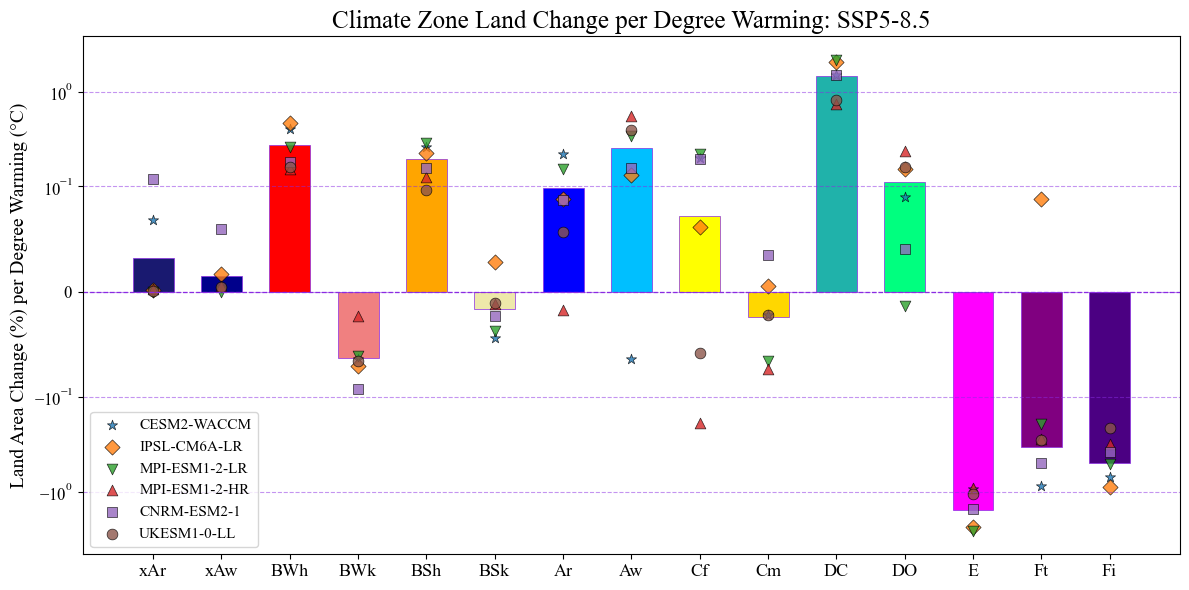

In [199]:
# Your zone colors
zone_colors = {
    "BWh": "red", "BWk": "lightcoral", "BSh": "orange", "BSk": "palegoldenrod",
    "Ar": "blue", "Aw": "deepskyblue", "Cf": "yellow", "Cm": "gold",
    "DO": "springgreen", "DC": "lightseagreen", "E": "magenta",
    "Ft": "purple", "Fi": "indigo", "xAr": "midnightblue", "xAw": "darkblue"
}

zone_ids = {
    "xAr": 1, "xAw": 2, "BWh": 3, "BWk": 4, "BSh": 5, "BSk": 6, "Ar": 7, "Aw": 8, "Cf": 9,
    "Cm": 10, "DC": 11, "DO": 12, "E": 13, "Ft": 14, "Fi": 15
}

# Define your markers per model (keys must match your model names exactly)
model_markers = {
    "CESM2-WACCM": "*",      # star
    "IPSL-CM6A-LR": "D",     # diamond
    "MPI-ESM1-2-LR": "v",    # downwards triangle
    "MPI-ESM1-2-HR": "^",    # upwards triangle
    "CNRM-ESM2-1": "s",      # square
    "UKESM1-0-LL": "o"       # circle
}

unwanted_zones = {'BS', 'BW'}

zones = [z for z in sorted(average_zone_change.keys(), key=lambda z: zone_ids.get(z, float('inf')))
         if z not in unwanted_zones]

x = range(len(zones))
avg_values = [average_zone_change[zone] for zone in zones]
bar_colors = [zone_colors.get(zone, "gray") for zone in zones]

plt.figure(figsize=(12, 6))
plt.bar(x, avg_values, color=bar_colors, width=0.6, edgecolor='blueviolet', linewidth=0.5)

for model in model_markers:
    if model not in results_indv:
        continue
    marker = model_markers[model]
    y_vals = [results_indv[model].get(zone, float('nan')) for zone in zones]
    plt.scatter(x, y_vals, marker=marker, s=60, edgecolor='black', label=model, linewidth=0.5, alpha=0.8)

plt.yscale('symlog', linthresh=0.1)
plt.gca().yaxis.set_major_locator(SymmetricalLogLocator(base=10, linthresh=0.1))

plt.xticks(x, zones, ha='center', fontsize=13, fontfamily="Times New Roman")
plt.yticks(fontsize=12, fontfamily="Times New Roman")
plt.ylabel("Land Area Change (%) per Degree Warming (°C)", fontsize=14, fontfamily="Times New Roman")
plt.title("Climate Zone Land Change per Degree Warming: SSP5-8.5", fontsize=18, fontfamily="Times New Roman")
plt.axhline(0, color='blueviolet', linewidth=0.9, linestyle='--')
plt.grid(axis='y', linestyle='--', alpha=0.5, color='blueviolet')
legend_font = FontProperties(family="Times New Roman", size=11)
plt.legend(prop=legend_font, loc='lower left')
plt.tight_layout()

#plt.savefig('/Users/jaybr/OneDrive/Desktop/RESEARCH/CHNGE.WARMING_BARCHART_GLOBAL_SSP5-8.5.png', dpi=300, bbox_inches='tight')
plt.show()